# PostProcess edx

In [90]:
import os

folder_path = "out-edx-12"

# Find all .tiff files that contain 'haadf' in their name (case-insensitive)
haadf_files = [
    f for f in os.listdir(folder_path)
    if f.lower().endswith(".tiff") and "haadf" in f.lower()
]

# Ensure there’s exactly one match
if len(haadf_files) == 1:
    file_name = os.path.join(folder_path, haadf_files[0])
    print("Found HAADF file:", file_name)
elif len(haadf_files) == 0:
    raise FileNotFoundError("No HAADF .tiff file found in folder.")
else:
    file_name = os.path.join(folder_path, haadf_files[-1])
    raise ValueError(f"Multiple HAADF .tiff files found: {haadf_files}")

Found HAADF file: out-edx-12/HAADF_image_20251103_152225.tiff


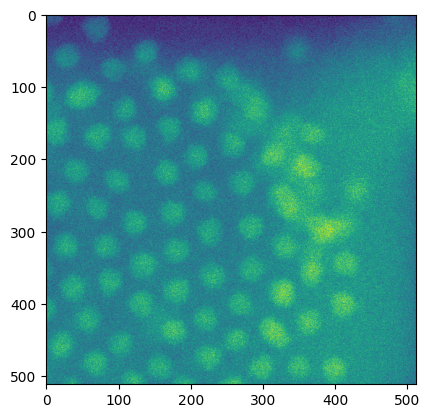

In [91]:
import tifffile
import matplotlib.pyplot as plt
with tifffile.TiffFile(file_name) as tif:
    haadf = tif.asarray()
    
plt.imshow(haadf)

In [ ]:

## read the .npy normalized SI  and postion of particles

import numpy as np

pixel_pos = np.load(folder_path + "/" + "pixel_pos.npy")
spectra_norm = np.load(folder_path + "/" + "normalized_spectra.npy")
# raw_spectra = np.load(folder_path + "/" + "raw_spectra.npy")

In [93]:
xs, ys = pixel_pos[:, 0], pixel_pos[:, 1]

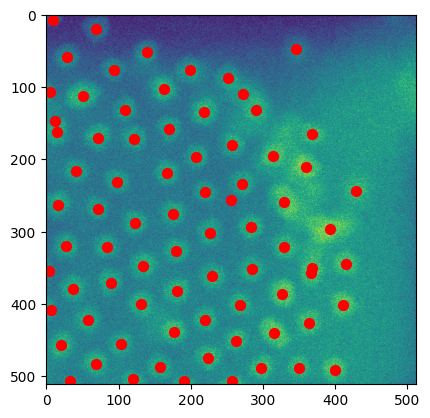

In [94]:
# plot position sampled
plt.imshow(haadf)
plt.scatter(xs, ys, s=50, c="r")
# want to save this? - nope

In [95]:
# pca the data
# import libraries

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

k = 10
pca = PCA(n_components=k, random_state=42)
scores = pca.fit_transform(spectra_norm)  # shape (N, k)

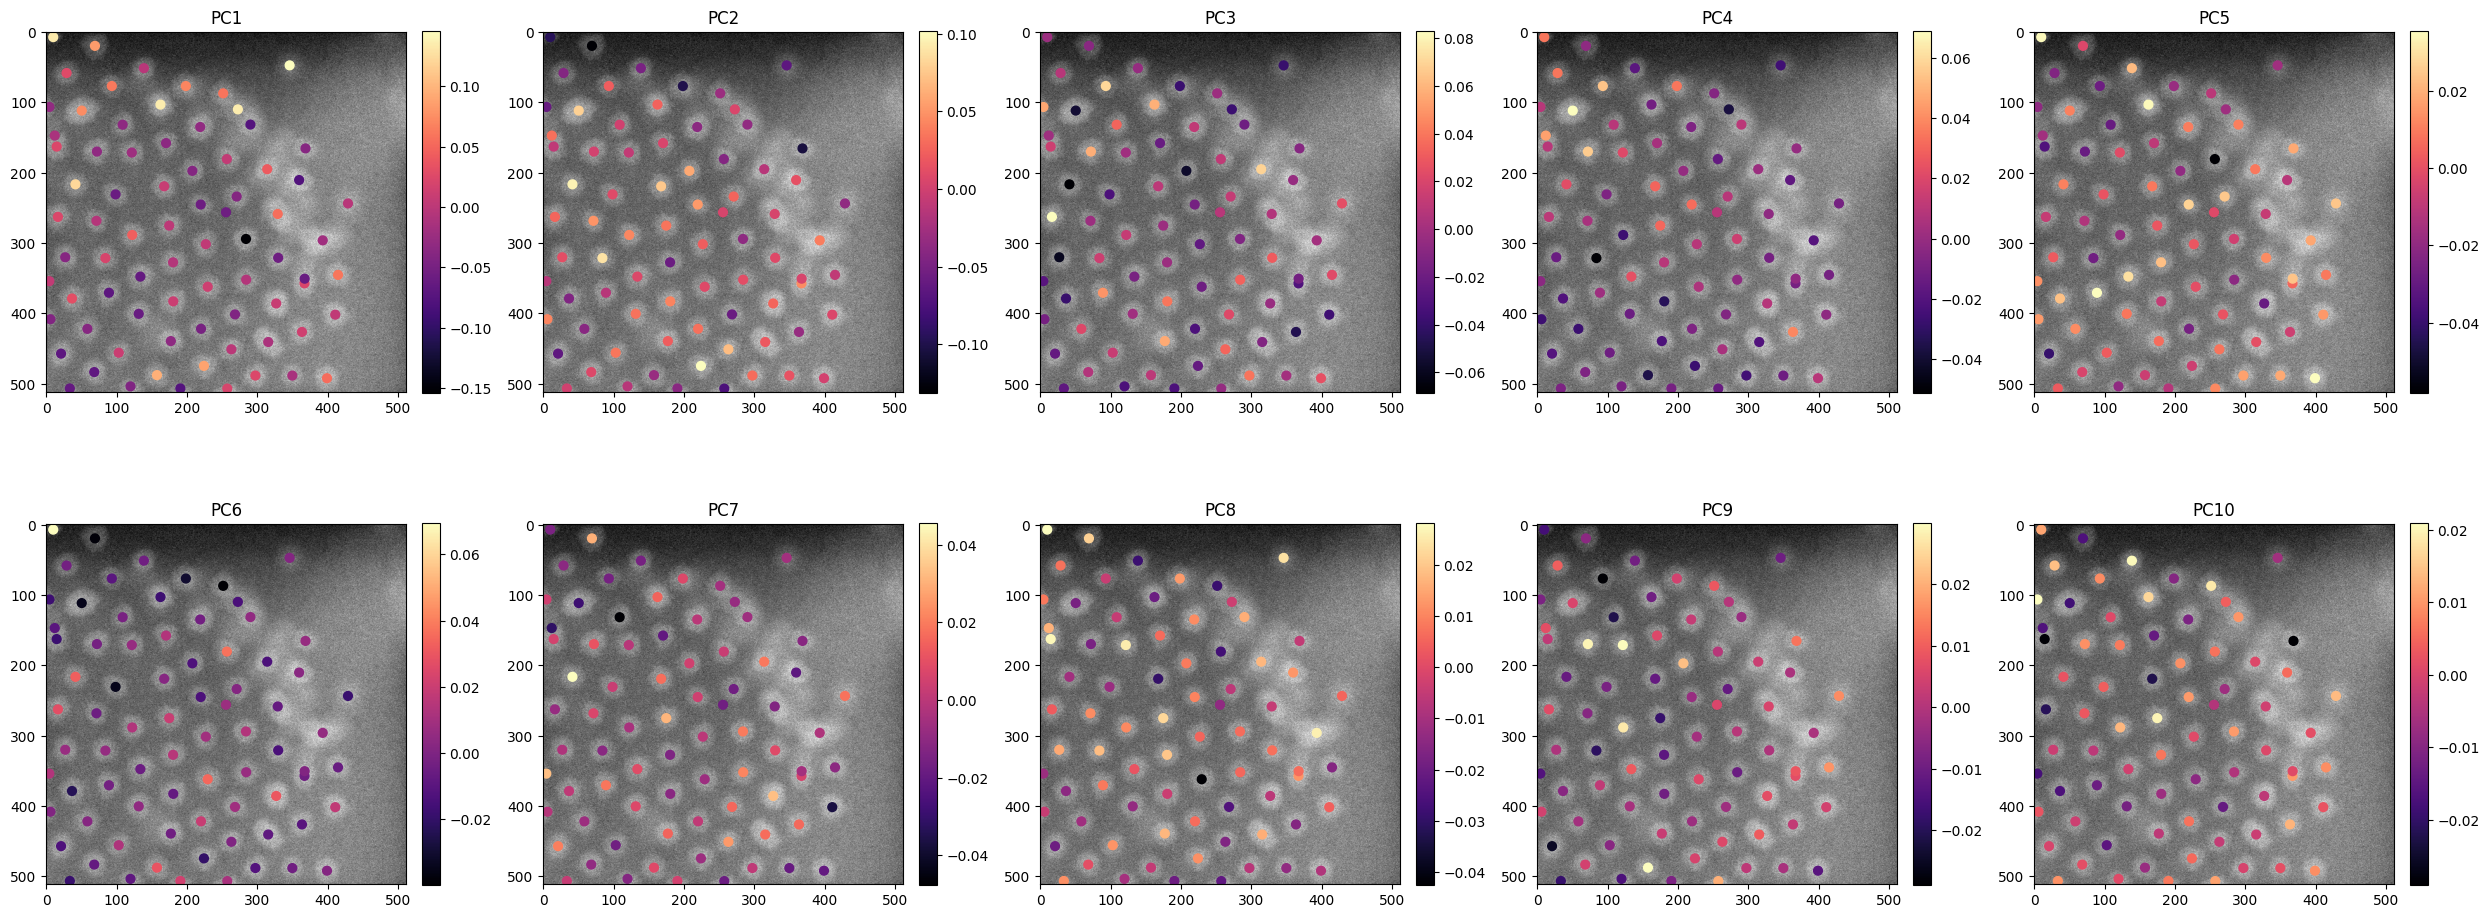

In [96]:
import matplotlib.pyplot as plt

num_pcs = scores.shape[1]  # e.g., 10
n_cols = 5
n_rows = (num_pcs + n_cols - 1) // n_cols  # ensures enough rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))

for i in range(num_pcs):
    ax = axes.flat[i]
    ax.imshow(haadf, cmap="gray")
    sc = ax.scatter(xs, ys, c=scores[:, i], s=40, cmap="magma")
    ax.set_title(f"PC{i+1}")
    plt.colorbar(sc, ax=ax, fraction=0.046, pad=0.04)

# Hide unused subplots (if any)
for j in range(num_pcs, n_rows * n_cols):
    axes.flat[j].axis('off')

plt.tight_layout()
plt.show()
